In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata,study_results,how='outer')

# Display the data table for preview

combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [148]:
clean_study_df = combined_study_df.drop_duplicates(['Mouse ID','Timepoint'],keep=False)

In [149]:
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [150]:
# Generate a summary statistics table consisting of the mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

# Tumor Volume
tumor_average = round(clean_study_df['Tumor Volume (mm3)'].mean(),2)
tumor_median = round(clean_study_df['Tumor Volume (mm3)'].median(),2)
tumor_var = round(np.var(clean_study_df['Tumor Volume (mm3)']),2)
tumor_std = round(np.std(clean_study_df['Tumor Volume (mm3)']),2)
tumor_sem = round(st.sem(clean_study_df['Tumor Volume (mm3)']),2)

summary_table = pd.DataFrame({'Tumor Mean':[tumor_average],
                              'Tumor Median':[tumor_median],
                              'Tumor Variance':[tumor_var],
                              'Tumor STD':[tumor_std],
                              'Tumor SEM':[tumor_sem]})
summary_table

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
0,50.45,48.95,79.43,8.91,0.21


In [151]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

group_study_df = clean_study_df.groupby(['Drug Regimen']).count()


group_study_df = group_study_df.reset_index(drop=False)

group_study_df

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,151,151,151,151,151,151,151
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


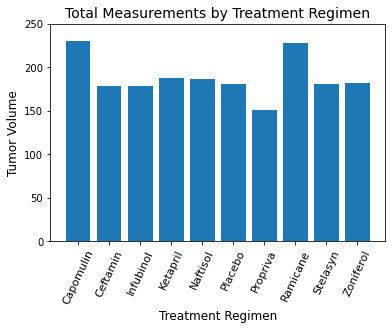

In [152]:
## Graph 
plt.bar(x_axis,y_axis)
x_axis = np.arange(len(group_study_df))
y_axis = group_study_df['Tumor Volume (mm3)']
tick_location = [value for value in x_axis]
plt.xticks(tick_location,group_study_df['Drug Regimen'],rotation='65',fontsize=11)
plt.title('Total Measurements by Treatment Regimen',fontsize=14)
plt.xlabel('Treatment Regimen',fontsize=12)
plt.ylabel('Tumor Volume',fontsize=12)
plt.ylim(0,250)

plt.show()

(0.0, 250.0)

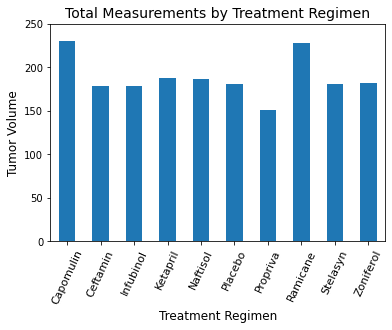

In [153]:
## Graph pandas

plot_pandas = group_study_df['Tumor Volume (mm3)'].plot(kind='bar')
tick_location = [value for value in x_axis]
plt.xticks(tick_location,group_study_df['Drug Regimen'],rotation='65',fontsize=11)
plt.title('Total Measurements by Treatment Regimen',fontsize=14)
plt.xlabel('Treatment Regimen',fontsize=12)
plt.ylabel('Tumor Volume',fontsize=12)
plt.ylim(0,250)

In [154]:
## Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
## that shows the distribution of female or male mice in the study.

group_gender_df = clean_study_df.groupby('Sex').count()
group_gender_df

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,925,925,925,925,925,925,925
Male,958,958,958,958,958,958,958


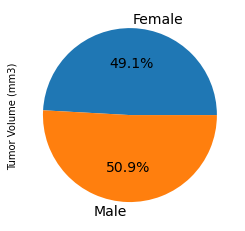

In [155]:
pie_chart = group_gender_df['Tumor Volume (mm3)'].plot(kind='pie',autopct='%1.1f%%',fontsize=14)


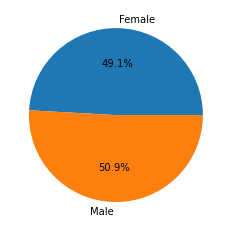

In [170]:
new_df = group_gender_df.reset_index(drop=False)


labels = new_df['Sex']
size = new_df['Tumor Volume (mm3)']
plt.pie(size,labels=labels,autopct='%1.1f%%')


plt.show()

In [ ]:
## Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
## Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and 
## quantitatively determine if there are any potential outliers across all four treatment regimens.

